In [3]:
cd D:\Users\Niels\Documents\Machine learning\python\ING

D:\Users\Niels\Documents\Machine learning\python\ING


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
x = np.array([0., 1., 2., 3., 4., 5.])
bins = np.array([0, 1, 2, 3, 4, 5])
bins = np.digitize(x,bins,right=False)
print(np.digitize(x,bins,right=True))
print(np.digitize(x,bins,right=False))
bins = np.array([0, 1, 2, 3, 4, 5])
print(np.digitize(x,bins,right=True))
print(np.digitize(x,bins,right=False))

[0 0 1 2 3 4]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[1 2 3 4 5 6]


In [6]:
def makeFactorHistogram(factor, signal, minBin, maxBin, nBins):
    # Make a set of bins
    bins = np.linspace(minBin, maxBin, nBins)
    # Assign the factor values to bin numbers
    bin_numbers = np.digitize(factor, bins, right=False)
    
    # Total number of factor points per bin
    total_counts = np.zeros(nBins + 1)
    # Total signal per bin
    signal_counts = np.zeros(nBins + 1)

    # Loop through factor bin values
    for i, v in enumerate(bin_numbers):
        total_counts[v] += 1
        signal_counts[v] += signal[i]

    # Calculate the probability
    bin_probability = np.zeros(nBins + 1)
    for i in range(nBins + 1):
        if total_counts[i] > 0:
            bin_probability[i] = signal_counts[i]/total_counts[i]
        total_counts[i] /= len(bin_numbers)

    return bins, bin_probability, total_counts 

In [7]:
#data = pd.read_csv("train - subsample.csv")
data = pd.read_csv("train.csv")
print(data.head())
data_orig = data
print(data["bankrupt"].sum())
print("Number of lines: {} Default probability: {}".format(len(data.index), data["bankrupt"].sum()/len(data.index)))

   num_employees country                                      industry_desc  \
0          50253      CN  Nonscheduled Chartered Freight Air Transportat...   
1           1847      CN                 Offices of Real Estate Appraisers    
2          16184      CN                 Nuclear Electric Power Generation    
3             25      TR                   Ready-Mix Concrete Manufacturing   
4           4968      CN  Motor Vehicle Electrical and Electronic Equipm...   

   A_score  B_score  C_score  D_score  revenue2014  revenue2015  revenue2016  \
0      3.0      3.0      3.0      3.0          108          396          629   
1      2.0      2.0      4.0      NaN          956          647          513   
2      3.0      4.0      NaN      4.0          901         1930         3022   
3      2.0      2.0      2.0      NaN        11267         7787         6598   
4      NaN      3.0      2.0      5.0         2481         4512         9195   

   bankrupt  
0         0  
1         0  
2 

11


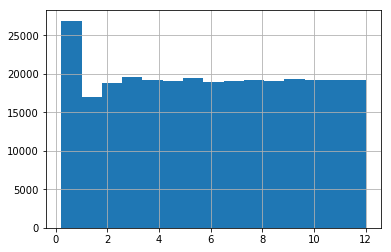

In [8]:
# Explore distribution of company size (number of employees)

# hist = data["num_employees"].hist(bins=10)
min_employees = np.min(data["num_employees"].values)
data["log_num_employees"] = data["num_employees"].apply(lambda x: np.log(x - (min_employees - 1 - 0.25)))
print(min_employees)
hist = data["log_num_employees"].hist(bins=15)
hist.plot()
plt.show()

In [9]:
# Explore countries.
# Get the list of countries with number of occurrences
countries = pd.value_counts(data["country"])
# Loop through the countries
for idx, total in countries.iteritems():
    subdata = data.loc[data["country"] == idx][["bankrupt"]]
    # Determine the number of bankruptcies and calculate default probability
    counts = pd.value_counts(subdata["bankrupt"]).multiply(1./total)
    print("Country: {}  Observations: {}  Default prob: {}".format(idx, total, counts.values[-1]))

Country: NL  Observations: 59038  Default prob: 0.11177546664859919
Country: CN  Observations: 58733  Default prob: 0.09892224132940595
Country: TR  Observations: 58648  Default prob: 0.08644796071477287
Country: US  Observations: 58395  Default prob: 0.06116962068670263
Country: EN  Observations: 58308  Default prob: 0.04453934280030185


In [10]:
# Explore countries.
data.groupby("country")["bankrupt"].agg(['count','mean']).sort_values(by='mean', ascending=False)

,count,mean
country,,
NL,59038,0.111775
CN,58733,0.098922
TR,58648,0.086448
US,58395,0.061170
EN,58308,0.044539


In [36]:
# 
default_cnt = data.groupby("country", as_index=False).agg({'bankrupt': ['count', 'mean']})
#default_cnt.columns = default_cnt.columns.droplevel(level=0)
default_cnt.columns = ['country', 'count', 'mean']
default_cnt.sort_values(by=['mean'], ascending=False, inplace=True)
default_cnt.head()

,country,count,mean
2,NL,59038,0.111775
0,CN,58733,0.098922
3,TR,58648,0.086448
4,US,58395,0.061170
1,EN,58308,0.044539


Number of Industries: 620 Mean No. Occurrences: 472.7774193548387 StDev: 22.220414570864325


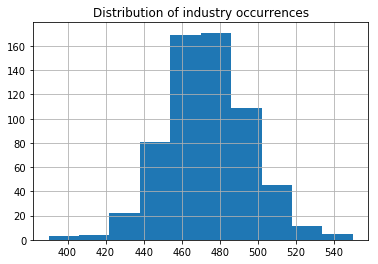

In [79]:
# Explore industries
# Get the list of industries with number of occurrences
industries = pd.value_counts(data["industry_desc"])
n_industries = industries.size
n_data = len(data.index)
print("Number of Industries: {} Mean No. Occurrences: {} StDev: {}".format(n_industries, industries.mean(), industries.std()))

# Histogram of industry occurrences
histInd = industries.hist()
histInd.plot()
plt.title("Distribution of industry occurrences") 
plt.show()

                                 industry_desc  count  bankrupt
113             Commodity Contracts Brokerage     469  0.522388
594  Trust, Fiduciary, and Custody Activities     519  0.518304
488                        Real Estate Credit     468  0.512821
164            Direct Life Insurance Carriers     428  0.507009
228                  Full-Service Restaurants     465  0.501075


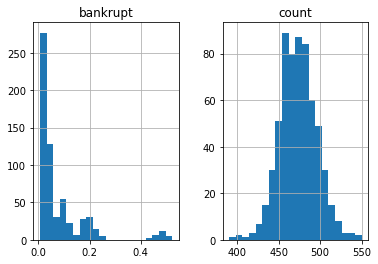

In [86]:
# Distribution of default probabilities by industry
default_ind = data.groupby("industry_desc", as_index=False).agg({'bankrupt': ['count', 'mean']})
#default_ind.columns = default_cnt.columns.droplevel(level=0)
default_ind.columns = ['industry_desc', 'count', 'bankrupt']
default_ind.sort_values(by=['bankrupt'], ascending=False, inplace=True)
print(default_ind.head(5))
hist = default_ind.hist(bins=20)

#plt.hist(default_ind['mean'].values, bins='auto')  # arguments are passed to np.histogram
#plt.title("Distribution of default prob")
#plt.show()

In [93]:
# Relabel the industry descipription to make it coarser 
default_labels = [chr(i) for i in range(ord('A'), ord('E') + 1)]
# Put each industry into a category (A to E) depending on the default probability of the industry
default_ind['bankrupt_cat'] = pd.cut(default_ind['bankrupt'].values, bins=[0,.025,.05,.15,.3,.6], labels=default_labels)

# Define a dictionary to map the bankrupt probability labels to the industries
dict_ind = pd.Series(default_ind.bankrupt_cat.values,index=default_ind.industry_desc.values).to_dict()

# Use the dictionary to update the industry description
data.replace({'industry_desc' : dict_ind}, inplace=True)
data.head()

,num_employees,country,industry_desc,A_score,B_score,C_score,D_score,revenue2014,revenue2015,revenue2016,bankrupt,log_num_employees
0,50253,CN,A,3.0,3.0,3.0,3.0,108,396,629,0,10.824631
1,1847,CN,B,2.0,2.0,4.0,NaN,956,647,513,0,7.516025
2,16184,CN,A,3.0,4.0,NaN,4.0,901,1930,3022,0,9.691176
3,25,TR,B,2.0,2.0,2.0,NaN,11267,7787,6598,0,2.724580
4,4968,CN,A,NaN,3.0,2.0,5.0,2481,4512,9195,1,8.508808


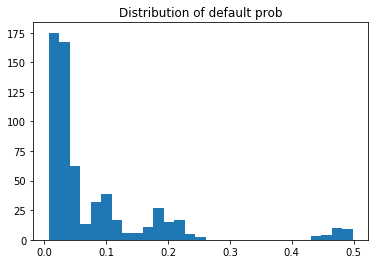

In [80]:
# Loop through the industries. Collect default probability
default_ind =[]
for idx, total in industries.iteritems():
    subdata = data.loc[data["industry_desc"] == idx][["bankrupt"]]
    # Determine the number of bankruptcies and calculate default probability
    default_prob = 0
    if total > 0:
        counts = pd.value_counts(subdata["bankrupt"]).multiply(1./total)
        default_prob = counts.values[-1]
    #print("Industry: {}  Observations: {}  Default prob: {}".format(idx, total, default_prob))
    default_ind.append(default_prob)
# Distribution of default probabilities by industry
plt.hist(default_ind, bins='auto')  # arguments are passed to np.histogram
plt.title("Distribution of default prob")
plt.show()

[ 0.          0.08201893  0.12127429  0.10172086  0.08859668  0.07756897
  0.07449159  0.06769463  0.06545147  0.06089965]
[ 0.     0.625  1.25   1.875  2.5    3.125  3.75   4.375  5.   ]
[ 0.          0.00108146  0.05986245  0.09139198  0.16215091  0.2661281
  0.16674968  0.14912221  0.04435696  0.05915626]


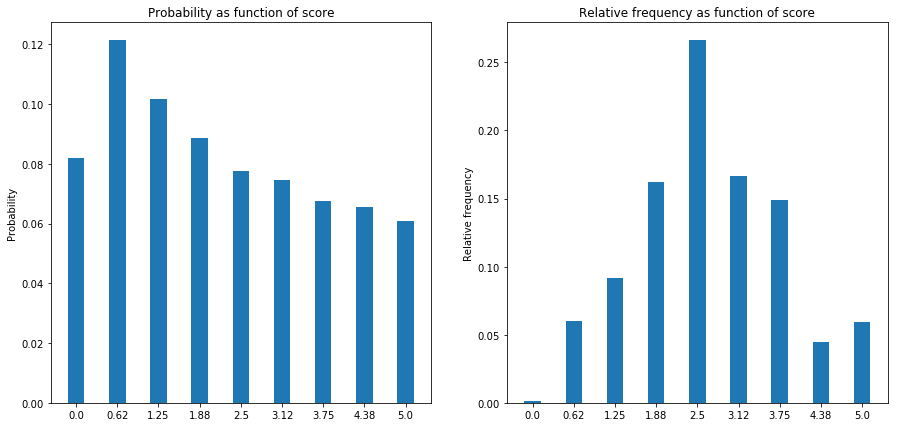

In [35]:
# Expore scores. First look at aggregate scores. Then look per score.
scores = data[["A_score", "B_score", "C_score", "D_score"]]
scores = data[["A_score", "B_score", "D_score"]]
mean_scores = scores.mean(axis=1).to_frame()
mean_scores.columns = ["score"]
mean_scores = mean_scores.join(data["bankrupt"])
#print(mean_scores.head(20))

mean_scores[["score"]] = mean_scores[["score"]].fillna(value=0.001)
bins, bankruptcy_prob, count_fraction = makeFactorHistogram(mean_scores["score"].values, mean_scores["bankrupt"].values, 0 , 5, 9)
print(bankruptcy_prob)
print(bins)
print(count_fraction)

plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(bins, bankruptcy_prob[1:], align='center', width=0.25)
plt.xticks(bins, np.round(bins,2))
plt.ylabel('Probability')
plt.title('Probability as function of score')

plt.subplot(1, 2, 2)
plt.bar(bins, count_fraction[1:], align='center', width=0.25)
plt.xticks(bins, np.round(bins,2))
plt.ylabel('Relative frequency')
plt.title('Relative frequency as function of score')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


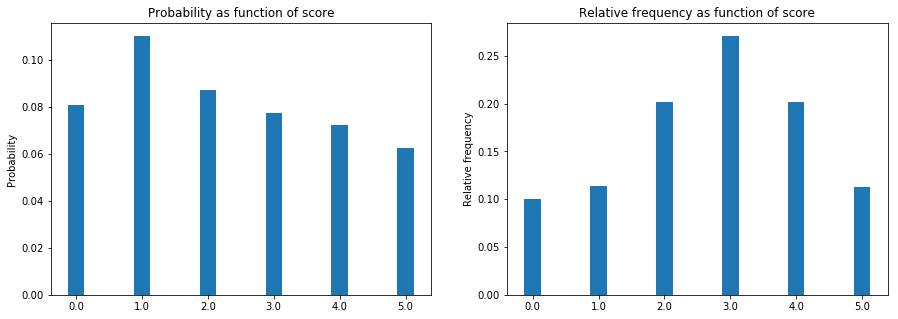

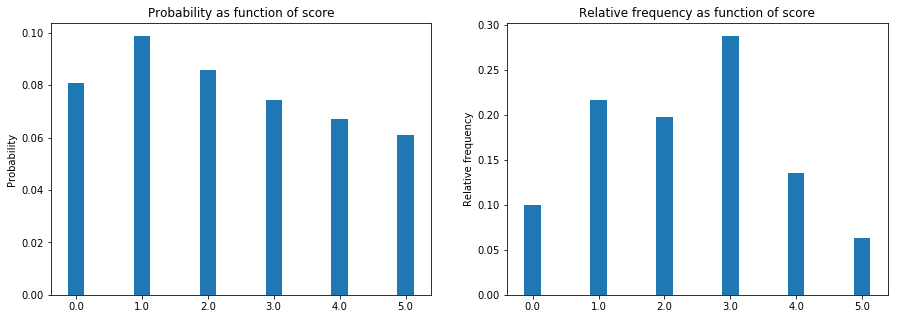

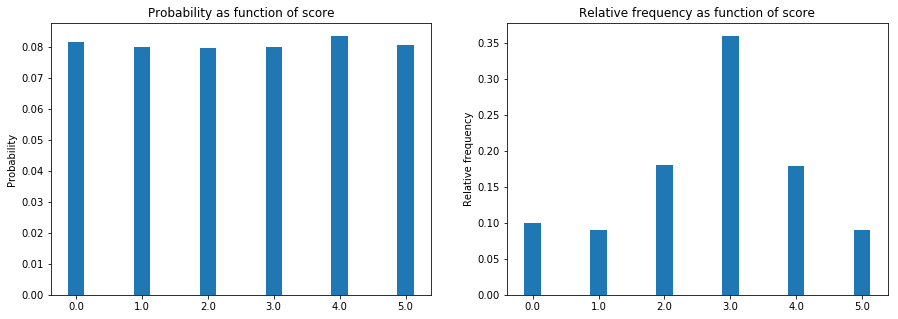

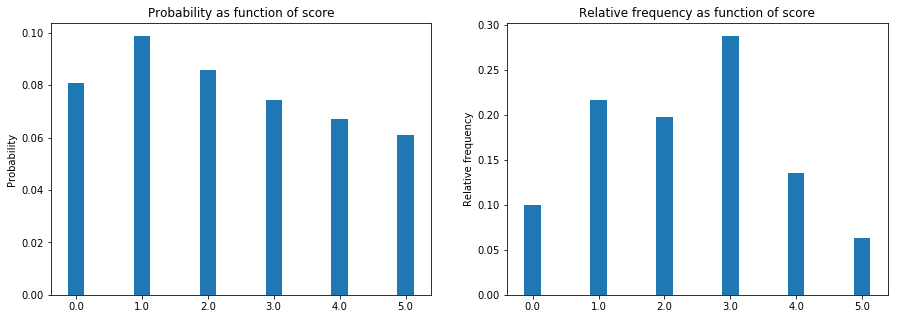

In [33]:
# Expore scores. First look at aggregate scores. Then look per score.
score_labels = ["A_score","B_score","C_score","B_score"]
for score in score_labels:
    mean_scores = data[[score,"bankrupt"]]
    # This is giving a warning
    mean_scores.loc[:,[score]] = mean_scores.fillna({score:0})
    #mean_scores[[score]] = mean_scores[[score]].fillna(value=0.001)

    bins, bankruptcy_prob, count_fraction = makeFactorHistogram(mean_scores[score].values, mean_scores["bankrupt"].values, 0 , 5, 6)
    
    plt.subplots(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    plt.bar(bins, bankruptcy_prob[1:], align='center', width=0.25)
    plt.xticks(bins, np.round(bins,2))
    plt.ylabel('Probability')
    plt.title('Probability as function of score')

    plt.subplot(1, 2, 2)
    plt.bar(bins, count_fraction[1:], align='center', width=0.25)
    plt.xticks(bins, np.round(bins,2))
    plt.ylabel('Relative frequency')
    plt.title('Relative frequency as function of score')

    plt.show()
    

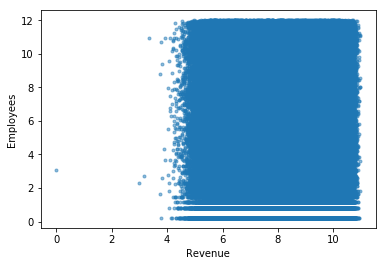

In [47]:
# Expore revenues. 
revenues = data[["revenue2014", "revenue2015", "revenue2016"]]
mean_revenues = revenues.mean(axis=1).to_frame()
mean_revenues.columns = ["revenues"]
min_revenues = np.min(mean_revenues["revenues"].values)
mean_revenues["revenues"] = mean_revenues["revenues"].apply(lambda x: np.log(x - min_revenues + 1))
mean_revenues = mean_revenues.join(data["bankrupt"])
#print(mean_revenues.head(20))

# Histogram of revenues
histRev = mean_revenues["revenues"].hist(bins=15)
histRev.plot()
plt.title("Distribution of revenues") 

# Check (log) revenues vs. (log) number of employees
#plt.scatter(mean_revenues["revenues"].values, data["log_num_employees"].values, alpha=0.5, marker=".")
#plt.xlabel("Revenue")
#plt.ylabel("Employees")
#plt.show()

# Check bankruptcy dependence on log of revenues

In [49]:
# Calculate the revenue momentum
slopes=[]
for index, d in data.iterrows():
    m = np.mean(d.values[7:10])
    b =np.polyfit(np.array([1, 2, 3,]) , d.values[7:10], 1)
    slopes.append(b[0]/m)
#print(slopes)

In [50]:
mean_revenues = mean_revenues.join(pd.DataFrame(slopes, columns=["slope"]))

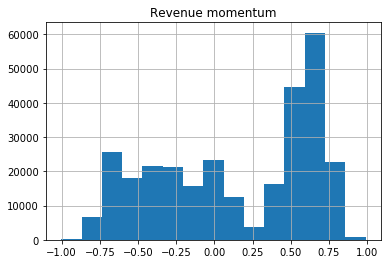

In [51]:
# Plot the revenue momentum
histRev = mean_revenues["slope"].hist(bins=15)
histRev.plot()
plt.title("Revenue momentum") 
plt.show()

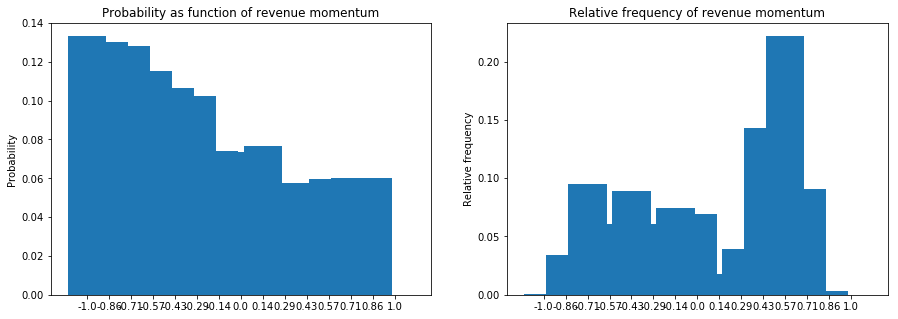

In [54]:
bins, bankruptcy_prob, count_fraction = makeFactorHistogram(mean_revenues["slope"].values, mean_revenues["bankrupt"].values, -1. , 1., 15)

plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(bins, bankruptcy_prob[1:], align='center', width=0.25)
plt.xticks(bins, np.round(bins,2))
plt.ylabel('Probability')
plt.title('Probability as function of revenue momentum')

plt.subplot(1, 2, 2)
plt.bar(bins, count_fraction[1:], align='center', width=0.25)
plt.xticks(bins, np.round(bins,2))
plt.ylabel('Relative frequency')
plt.title('Relative frequency of revenue momentum')

plt.show()

Number of Industries: 620 Mean No. Occurrences: 472.7774193548387 StDev: 22.220414570864325
       score  bankrupt
0   3.000000         0
1   2.666667         0
2   3.666667         0
3   2.000000         0
4   3.333333         1
5   1.750000         0
6   3.000000         0
7   1.666667         0
8   3.750000         0
9   4.500000         0
10  2.000000         0
11  2.000000         0
12  3.500000         0
13  3.333333         0
14  3.250000         0
15  2.000000         0
16  2.250000         0
17  2.500000         0
18  4.250000         0
19  2.500000         0
[  0.00000000e+00   0.00000000e+00   3.37800000e+03   1.76360000e+04
   3.03330000e+04   7.58720000e+04   7.01920000e+04   4.43150000e+04
   3.56740000e+04   1.56920000e+04   3.00000000e+01]
[  0.00000000e+00   0.00000000e+00   4.13000000e+02   1.95700000e+03
   2.98100000e+03   6.41100000e+03   5.35500000e+03   3.18100000e+03
   2.36100000e+03   9.87000000e+02   2.00000000e+00]
[ 0.          0.          0.12226169  0.110

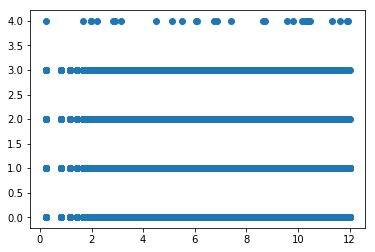

In [ ]:
# Explore missing data

# Total number of missing data per score
scores = data[["A_score", "B_score", "C_score", "D_score"]]
missing_per_column = pd.DataFrame(scores.isnull().sum(), columns=["Count"])
print(missing_per_column)

# Missing data per line. Sum number of missing data
missing_per_row = pd.DataFrame(scores.isnull().sum(axis=1), columns=["missing_count"])
data = data.join(missing_per_row)
print(pd.value_counts(missing_per_row["missing_count"]).values)

# Distribution of missing data as a function of the number of employees (size of company)

bins = [1., 1.7, 2.8, 4, 5.5]
binned = pd.DataFrame(np.searchsorted(bins, data["log_num_employees"].values), columns=["num_employee_label"])
data = data.join(binned)

for i in range(4):
    subdata = data.loc[data["num_employee_label"] == i + 1][["num_employee_label", "missing_count"]]
    print(pd.value_counts(subdata["missing_count"]).values * 100 / len(subdata.index))
exit()


print(data.loc[data["num_employee_label"] == 1][["num_employee_label","missing_count"]])


# print(pd.cut(missing_per_row_data, bins, labels=bins[:-1]))

fig, ax = plt.subplots()
ax = plt.scatter(data["log_num_employees"].values, data["missing_count"].values)
plt.show()